# Manolis Markou, assesment

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
#import matplotlib.pyplot as plt


sns.set(rc={'figure.figsize':(30.7,14.27)},style="whitegrid", palette="pastel", color_codes=True,font_scale = 2)
#sns.set(font_scale = 2)
#sns.set()

raw_file = 'raw-export.csv'
labels_file = 'labels.csv'


raw=pd.read_csv (raw_file,dtype={'q1':int,'q2':int})
#everything is read as float because of the NaN values in order for q1 and q2 to be easily turned to desired strings
#they are read as ints

labels=pd.read_csv (labels_file)
raw.head()

,ID number,q0,q1,q2,q3,q4
0,0,2.0,61,4,21.0,NaN
1,1,1.0,22,3,NaN,15.0
2,2,2.0,22,1,4.0,NaN
3,3,2.0,30,2,4.0,NaN
4,4,2.0,38,1,NaN,6.0


Task 1

In [3]:
#creating the possible categories so that get_dummies will add ALL the possible columns. 
#Without this, answers that are not represented in the raw file would not be represented here

possible_categories = list(range(1,1+len(labels[labels["Question Code"]=="q1"])))
#getting the categories from labels file

q1 = raw.q1

q1 = q1.astype(pd.CategoricalDtype(categories=possible_categories))
#setting q1's filetype

dummyrawq1=pd.get_dummies(q1,prefix="q1")
#
#the following code can be used to set whatever column names exist in the labels 
#in case the data is not as uniform as this

#labelnames=labels[labels["Question Code"]=="q1"]["Question ID"]
#labelnames=labelnames.reset_index(drop=True)
#dummyrawq1.columns=labelnames

dummyrawq1.head()

,q1_1,q1_2,q1_3,q1_4,q1_5,q1_6,q1_7,q1_8,q1_9,q1_10,...,q1_91,q1_92,q1_93,q1_94,q1_95,q1_96,q1_97,q1_98,q1_99,q1_100
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Task 2.a

    prefix="q2"

    colq2=list(set(raw.q2))

    labelnames=labels[labels["Question Code"]==prefix]["Question ID"]

    labelnames + q2 are the names of the columns the df will have and upon which Assign is going to make the changes required

    fullcolspace=labelnames.append(pd.Series(prefix))
    q2fulldf = pd.DataFrame(columns=fullcolspace)
    q2fulldf.q2=raw.q2

depending on how assign works maybe df should be 1st be filled with 0
#q2fulldf.fillna("0", inplace=True)

    for column in colq2:
    
        target_column=labelnames.iloc[column-1]
        condition="("+prefix+"=="+str(column)+")"
    
        Assign(condition=condition, target=target_column, value=1)


        


    Delete_column(target=[prefix])

b) The Assign dsl command has a broader use than it is needed as its last argument, value, is always going to be 1

In [4]:
#--------------------------------------------------Task 3 -------------------------------------------------
mapdict={
4: 1,
5: 2,
6: 2,
7: 3,
8: 4,
9: 5,
10: 6,
11: 7,
12: 8,
13: 9,
14: 10,
15: 10,
16: 13,
17: 13,
18: 14,
19: 14,
20: 11,
21: 12}

prefix="q3"

In [5]:
#-----------------------------------------------------a-------------------------------------------------------------
labelnames=labels[labels["Question Code"]==prefix]["Question ID"]

q3fulldf = pd.DataFrame(columns=labelnames)

q3=raw.q3.replace(mapdict) 
#Up to here the correct columns have been created along with the mapped answers of column q3.
#to fill those columns with the one-hot encodings either the Assign dsl command  described in task 2 or the get dummies
#showcased in task 1 approach can be used.
#However, a list-comprehension approach that can be considered "pure Python" is presented here

i=1
for column in labelnames:
    
    #target_column=labelnames.iloc[column-1]
    condition="str(column)"
    q3fulldf.iloc[:,i-1] = [1 if x==i else 0 for x in q3]
    i+=1

q3fulldf.head()

Question ID,q3_1,q3_2,q3_3,q3_4,q3_5,q3_6,q3_7,q3_8,q3_9,q3_10,q3_11,q3_12,q3_13,q3_14
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
#-------------------------------------b---------------------------------------------------------------
def solomap(mapdict,ogcol,quesname):
    #just the mapping is not enough. The question name is going to be needed in order to create the correct headers
    #and the original column which is going to be mapped
    labelnamesdict=list(set((mapdict.values())))

    mappedcol=ogcol.replace(mapdict) 
    datadict={}
    i=1
    for column in labelnamesdict:        
        #target_column=labelnames.iloc[column-1]        
        #condition=str(column)
        condition=quesname+"_"+str(column)
        col = [1 if x==i else 0 for x in mappedcol]
        datadict[condition]=col
        i+=1
    df=pd.DataFrame(datadict) #can be added or not depending on what is the norm in GWI for returning functions
    return df

actualdf=solomap(mapdict,raw.q3,"q3")
#actualdf = pd.DataFrame(solomap(mapdict,raw.q3,"q3")) if a dict is returned
actualdf.head()

,q3_1,q3_2,q3_3,q3_4,q3_5,q3_6,q3_7,q3_8,q3_9,q3_10,q3_11,q3_12,q3_13,q3_14
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Task 4
My understanding of this task is that somehow some of the survey participants did not view the q3 question. Instead they viewed the q4 question which has some slight changes in its answers (more on that on Task 5). The above explains why q3 and q4 are complementary and each participant has an asnwer either on q3 or on q4. This issue has affected exactly half the participants (100) . 

In [7]:


print(raw.q3.isna().sum())
print(raw.q4.isna().sum())

mapping_q4 = {
4: 1,
5: 2,
6: 2,
7: 3,
8: 3,
9: 4,
10: 5,
11: 6,
12: 6,
13: 7,
14: 7,
15: 8,
16: 9,
17: 10,
18: 13,
19: 14,
20: 14,
21: 11,
22: 12}

raw.q4=raw.q4.replace(mapping_q4)
raw.q3=raw.q3.replace(mapdict)


100
100


In [8]:
#----------------------------------------------------a-b----------------------------------------------------
raw.fillna(0,inplace=True)
#
raw["q3new"]=raw["q3"]+raw["q4"]
# It looks like q3 and q4 were answered by different participants. I will sum and then test.


raw["correct"] = raw[['q3','q4']].isin(raw["q3new"]).any(1)
print(all(raw.correct))
#the above confirm that q3new contains either a value from q3 or a value from q4, after summing their values.
#This serves a proof to the notion that no participant answered both q3 and q4.

raw.drop(["correct"],axis=1,inplace=True) #no longer usable
raw.head()

True


,ID number,q0,q1,q2,q3,q4,q3new
0,0,2.0,61,4,12.0,0.0,12.0
1,1,1.0,22,3,0.0,8.0,8.0
2,2,2.0,22,1,1.0,0.0,1.0
3,3,2.0,30,2,1.0,0.0,1.0
4,4,2.0,38,1,0.0,2.0,2.0


# b-c
Probably, the results from the different question that was shown to some participants, were added as a separate column instead of being merged into the same , somewhere in the ETL. However, if they were merged correctly a problem would arise as to which mapping is approriate for each set of answers. To rectify this, I would either add the appropriate mapping dictionary or a flag denoting it on each row or map the answers altogether before merging the data.
Luckily, this was a rather straight forward case of data spill so I didn't find any obstacles in the merging. 




# Task 5

In [9]:
#-------------------------------------------Task 5-------------------------------------------------------
#a new column which will serve as a separatior for the correctly and incorrectly interviewed participants

raw["correct"] = [False if x==0 else True for x in raw.q3]

raw.correct.sum()

100

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Interviewed correctly')]

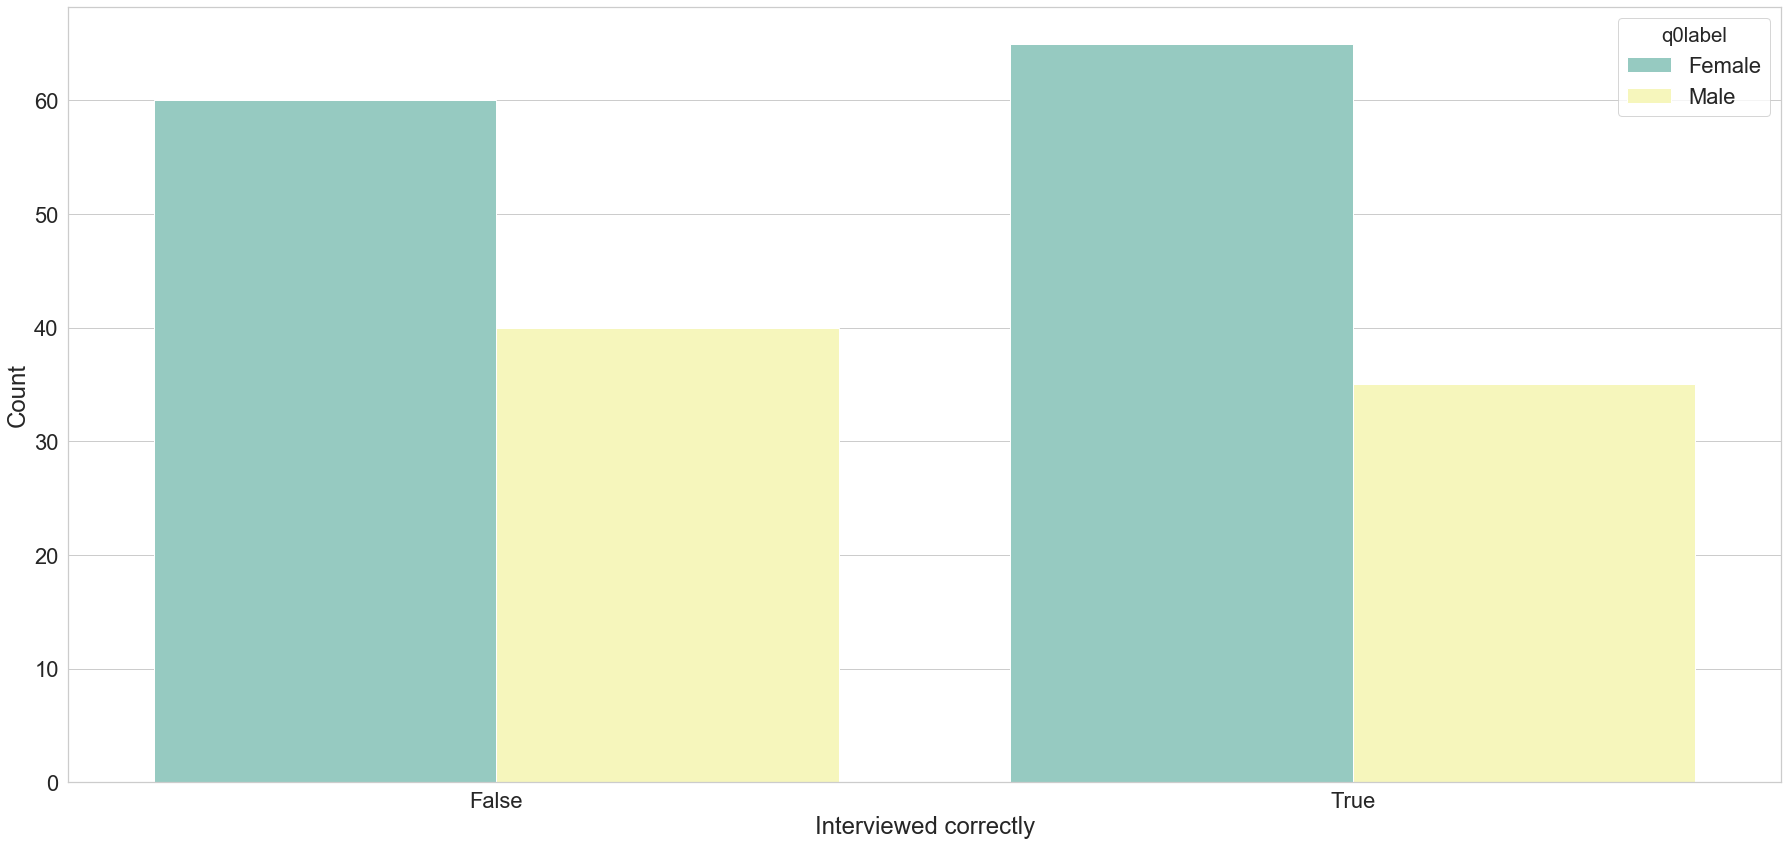

In [10]:
#------------------------------------------------a---------------------------
#the data has been split between columns q3 and q4.
#Why is there  a different mapping in q4 ?
raw.describe()

raw["q0label"]=["Male" if x==1 else "Female" for x in raw.q0]


#plt.figure(figsize=(30.7,14.27))

task5a =  sns.countplot(x="correct", hue="q0label", data=raw,palette="Set3")
#task5a.set_yticklabels(task5a.get_yticks(), size = 15)
#g.set_ylabels("survival probability")
task5a.set(xlabel='Interviewed correctly', ylabel='Count')



There is a slight difference between men and women being interviewed correctly and incorrectly but it is too small to be of any particular value. 

In [11]:
#------------------------------------b-----------------------------------------------------
print(raw.q1.describe())
#a general desription to get a sense of the ages as denoted in q1

count    200.000000
mean      41.370000
std       13.742174
min       17.000000
25%       30.000000
50%       39.500000
75%       53.000000
max       64.000000
Name: q1, dtype: float64


In [12]:
raw.groupby(["correct"])["q1"].mean()


correct
False    42.88
True     39.86
Name: q1, dtype: float64

The age average of falsely interviewed participants is over the overall mean age of the dataset, whereas the average of correctly interviewed is below. However this method has some weaknesses, so I will research a little more.

[Text(0, 0.5, 'Age'), Text(0.5, 0, 'Interviewed correctly')]

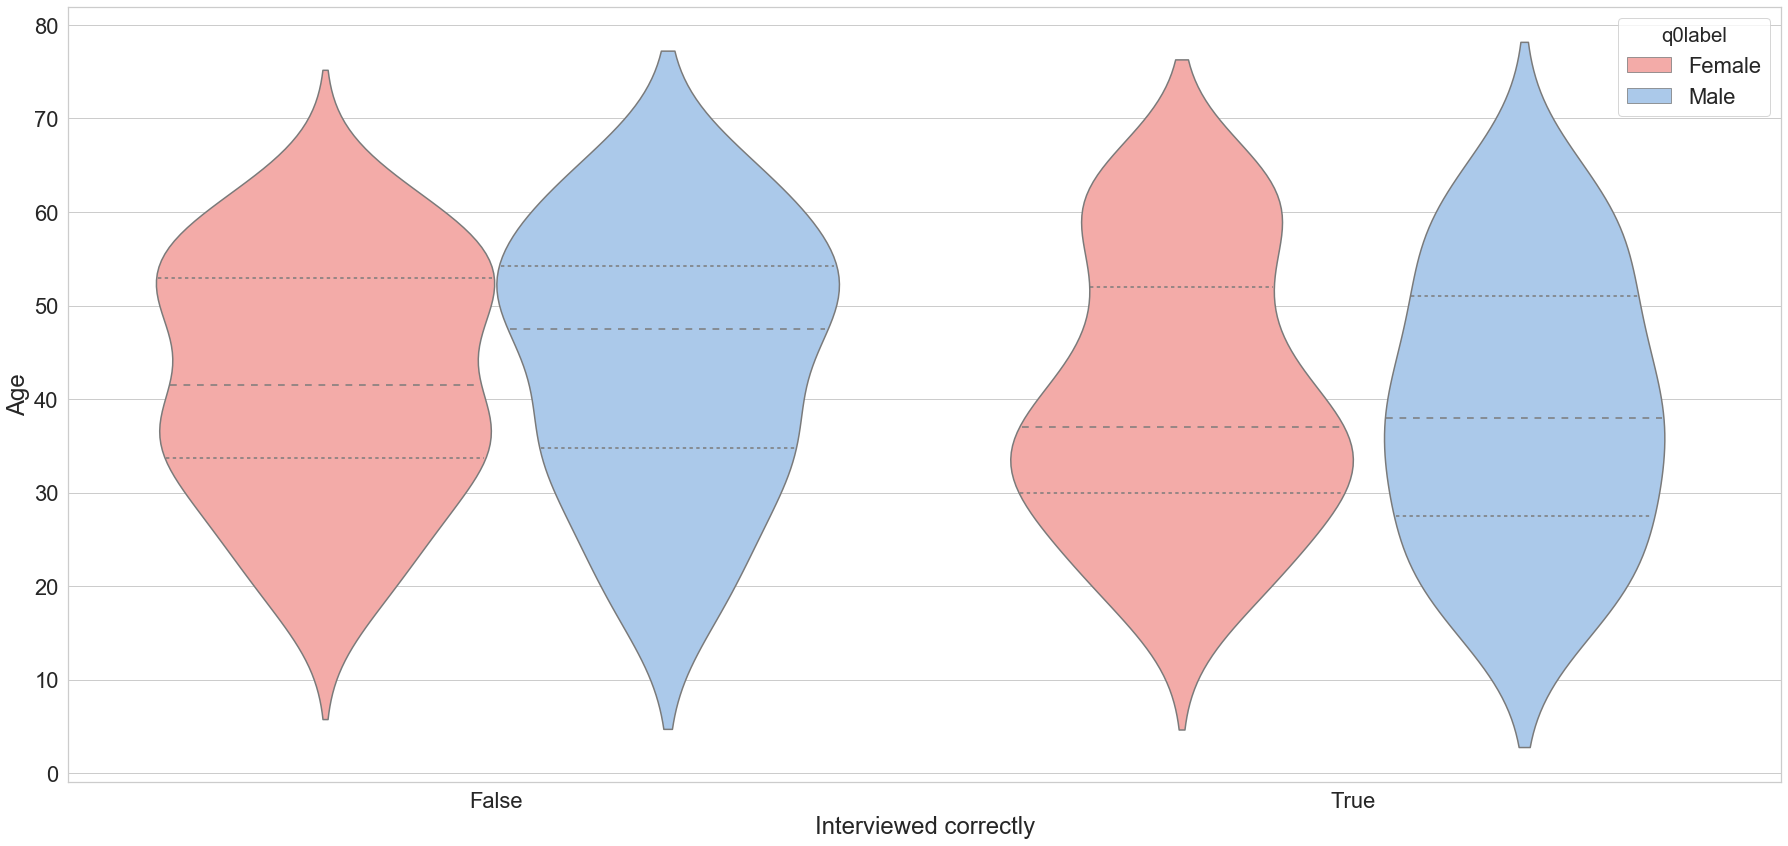

In [13]:
task5b=sns.violinplot(x="correct", y="q1", hue="q0label",
               split=False, inner="quart",
               palette={"Female": "r", "Male": "b"}, data=raw)
#sns.despine(left=True)
task5b.set(xlabel='Interviewed correctly', ylabel='Age')

The violin plot shows some correlation between age and completing the test incorrectly, especially for Males. However it does not offer a sense of how many of each age actually completed the test. To check this I will create some age bins.

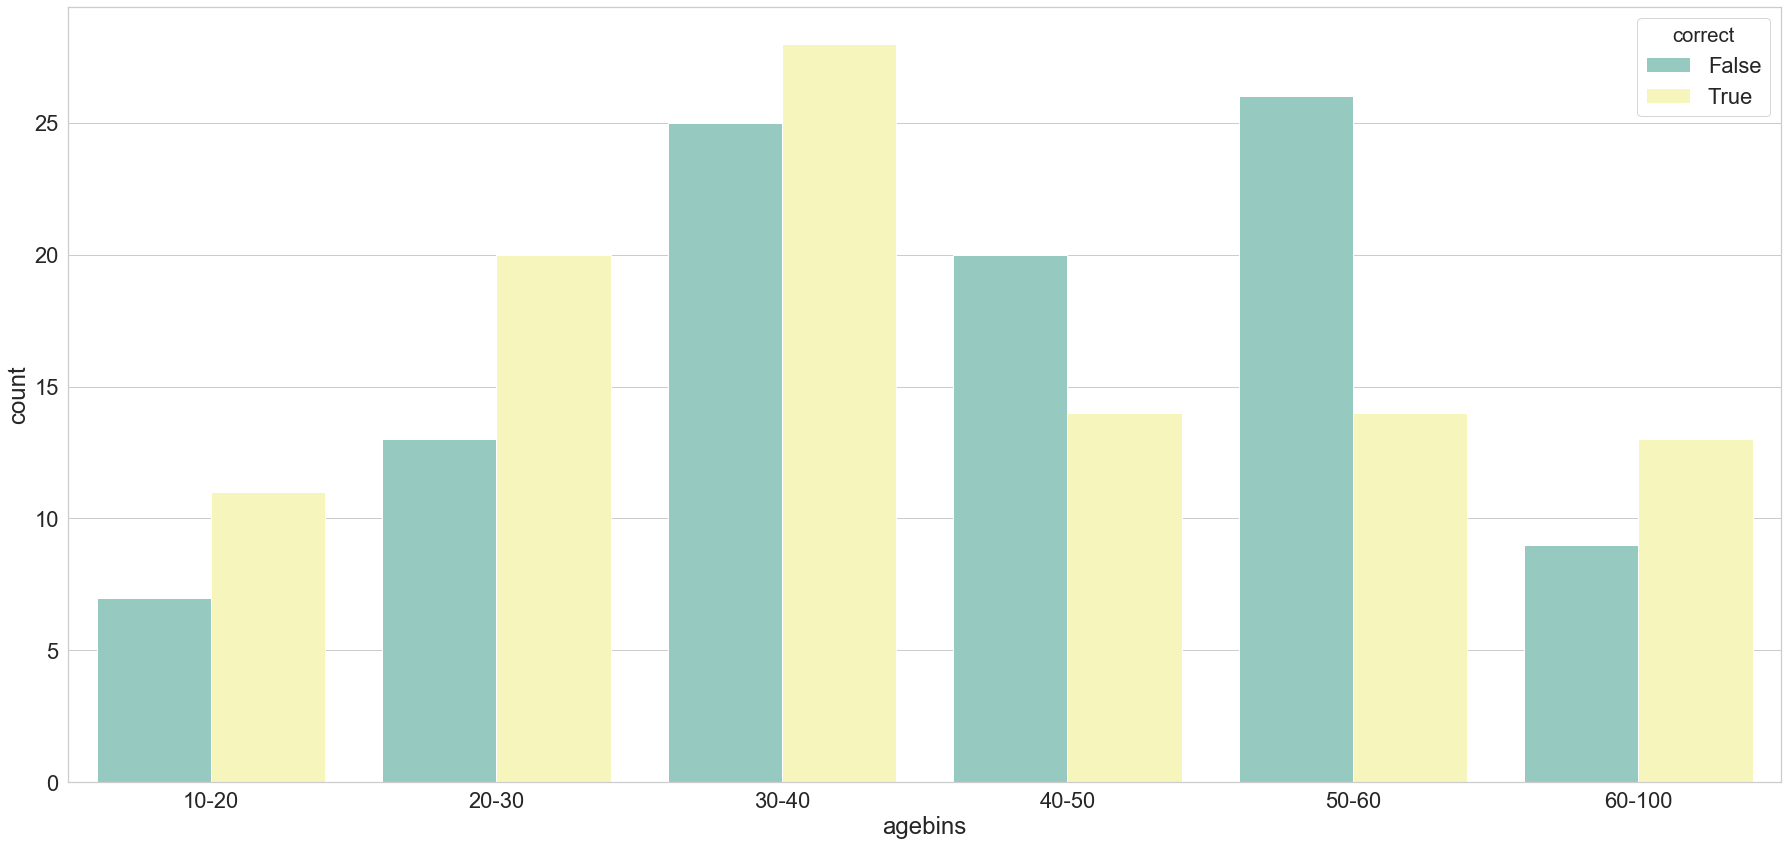

In [14]:
agebins = [10, 20, 30, 40, 50, 60, 100]
agelabels = ["10-20","20-30","30-40","40-50","50-60","Above 60"]
#
raw['agebins'] = pd.cut(raw['q1'], bins=agebins, labels=agelabels)
#print (df)
tak5b2=sns.countplot(x="agebins",hue="correct", data=raw,palette="Set3")

Here we can notice a trend where in the 10-20 , 20-30, 30-40 bins, participants are interviewed correctly more often. Whereas the 40-50 and the 50-60 follow the opposite trend, with the 50-60 group having alsmost 2:1 for a wrong interview. However the above 60 group reverses the trend again. In any case, there is a trend but I cannot say it is dominating.

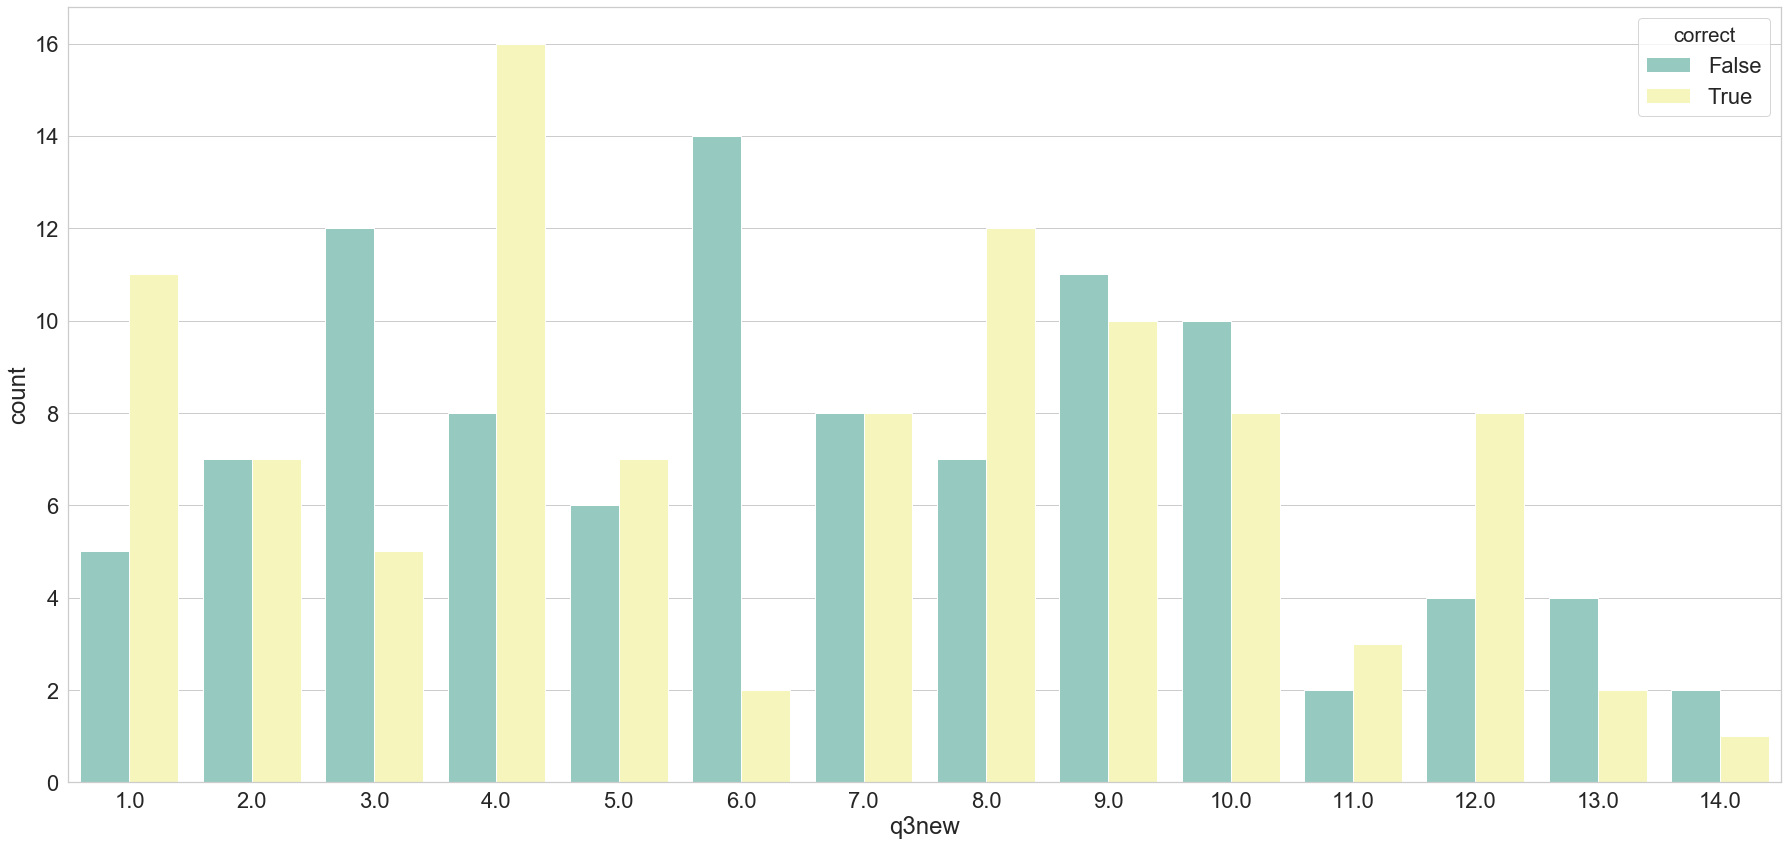

In [15]:
tak5c=sns.countplot(x="q3new",hue="correct", data=raw, palette="Set3")



# C

We see that in q4 the mapping labels differentiate from the q3 ones. 

q3:
        Base option		Precode
109	10,001 to 17,000 EUR	3
110	17,001 to 22,000 EUR	4
111	22,001 to 27,000 EUR	5
112	27,001 to 30,000 EUR	6
113	30,001 to 37,000 EUR	7
114	37,001 to 45,000 EUR	8
115	45,001 to 55,000 EUR	9
116	55,001 to 90,000 EUR	10
117    Don't know		        11
118	Prefer not to say	    12
119	90,001 to 125,000 EUR	13

q4:
123	10,001 to 20,000 EUR	3
124	20,001 to 25,000 EUR	4
125	25,001 to 32,000 EUR	5
126	32,001 to 40,000 EUR	6
127	40,001 to 50,000 EUR	7
128	50,001 to 60,000 EUR	8
129	60,001 to 75,000 EUR	9
130	75,001 to 100,000 EUR	10
131	Don't know		        11
132	Prefer not to say	    12
133	100,001 to 125,000 EUR	13

*Precodes 1,2 and 14 correspond to the same bin descriptions.

The prices are in EUR. Therefore it is safe to assume that the surveys' participants were in Europe. In Europe urban areas are getting more and more expensive to live in and as a result the same gross annual income does not translate to an equal Local Purchasing Power, which the is the metric that the answers are roughly trying to approximate.
So through the mapping we see that to account for the difference in the cost of living , the bin limits from the 3rd bin onwards are higher for the q4 answers.
For example, with 20.000 annual income on the q4-mapping, a participant is considered to be on the 3rd bin whereas on the q3 mapping she is considered to be on the 4th bin, effectively one step higher.
The difference is higlighted even more on precode 10. 55.000-90.000 is enough for q3 participants whereas for the participants of q4 it is 75.000-100.000. Therefore one could say that q4 was taken from urban areas so it is the sole reason for "correct" or "incorrect" interviews. 

Moreover, one could also claim that urban population are better paid, and indeed I see that for 9,10,13,14 the incorrectly interviewed participants (q4) score higher even with higher limits. However without more data to back it up this is speculation.


To conclude, the above is a form of deduction that makes sense, but may or may not hold. There could be other valid explanations as well, including that the q3 and q4 participants could live in totally different european countries.

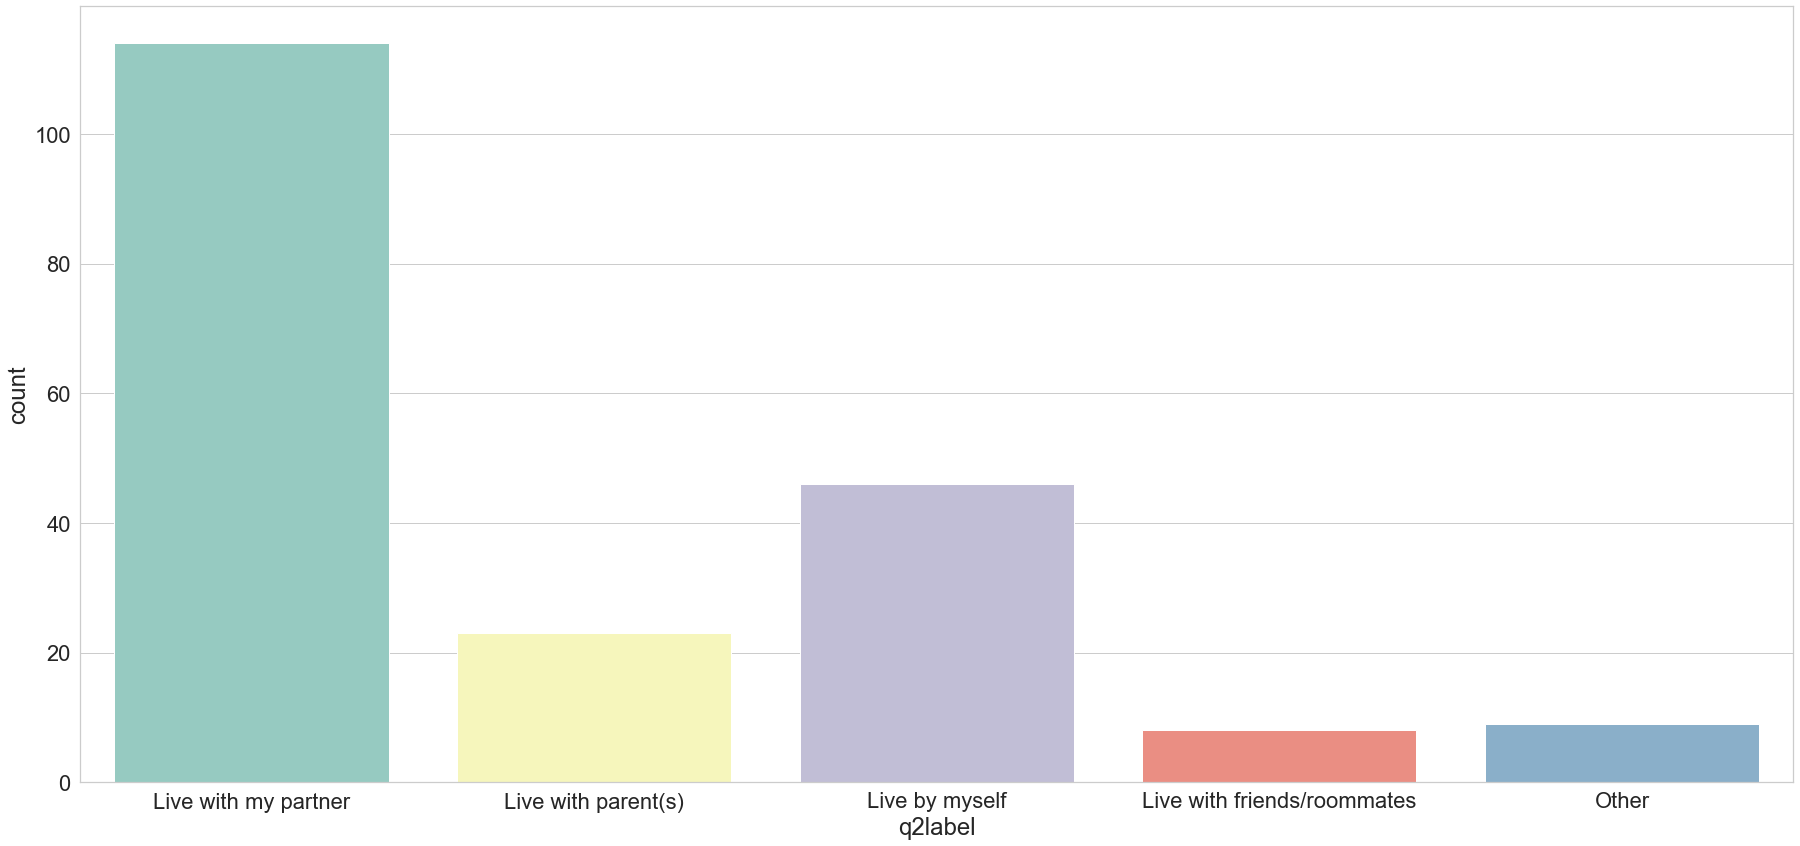

In [16]:
q2dict={1:"Live by myself",
2: "Live with friends/roommates",
3: "Live with parent(s)",
4: "Live with my partner",
5: "Other"}
#options 3 and 4 are reversed in the pdf and the labels.csv


raw["q2label"]=raw.q2.replace(q2dict)
task5d=sns.countplot(x="q2label", data=raw,palette="Set3")



The vast majority of the participants live with a partner. This in itself has value but I will explore more.

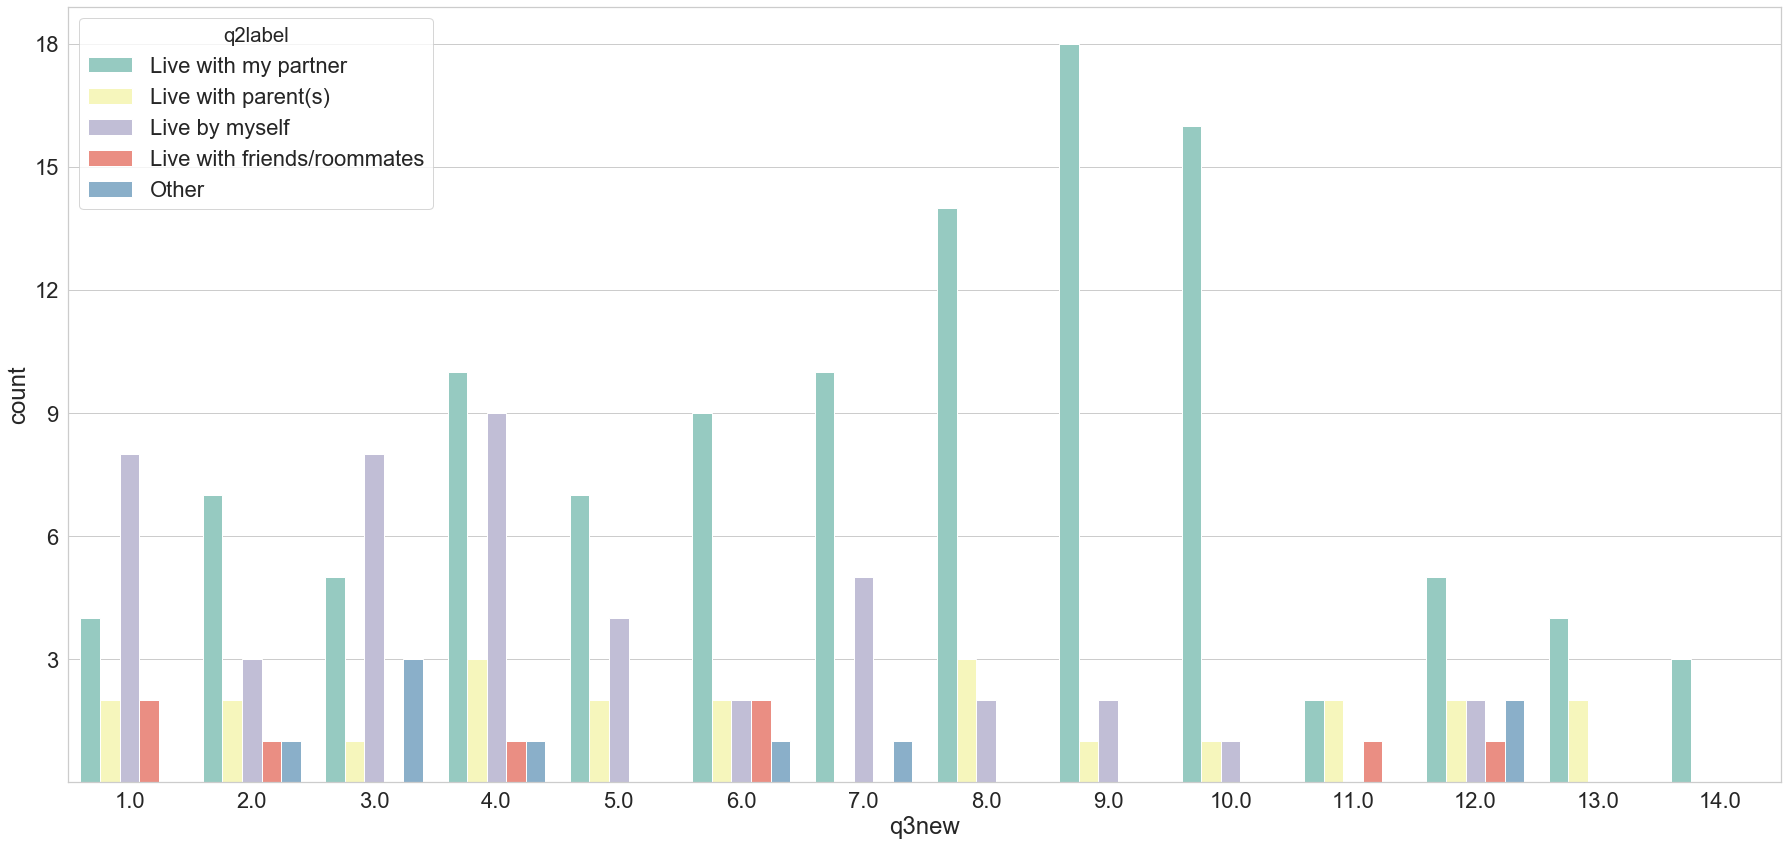

In [17]:
task5e=sns.countplot(x="q3new",hue="q2label", data=raw,palette="Set3")
task5e.set_yticks([3, 6, 9, 12, 15, 18])

The  more financially secure individuals live with partners (8,9,10,13,14 categories).

It is hard to believe that participants with an annual income below 2500 EUR live by themselves. This could indicate lying

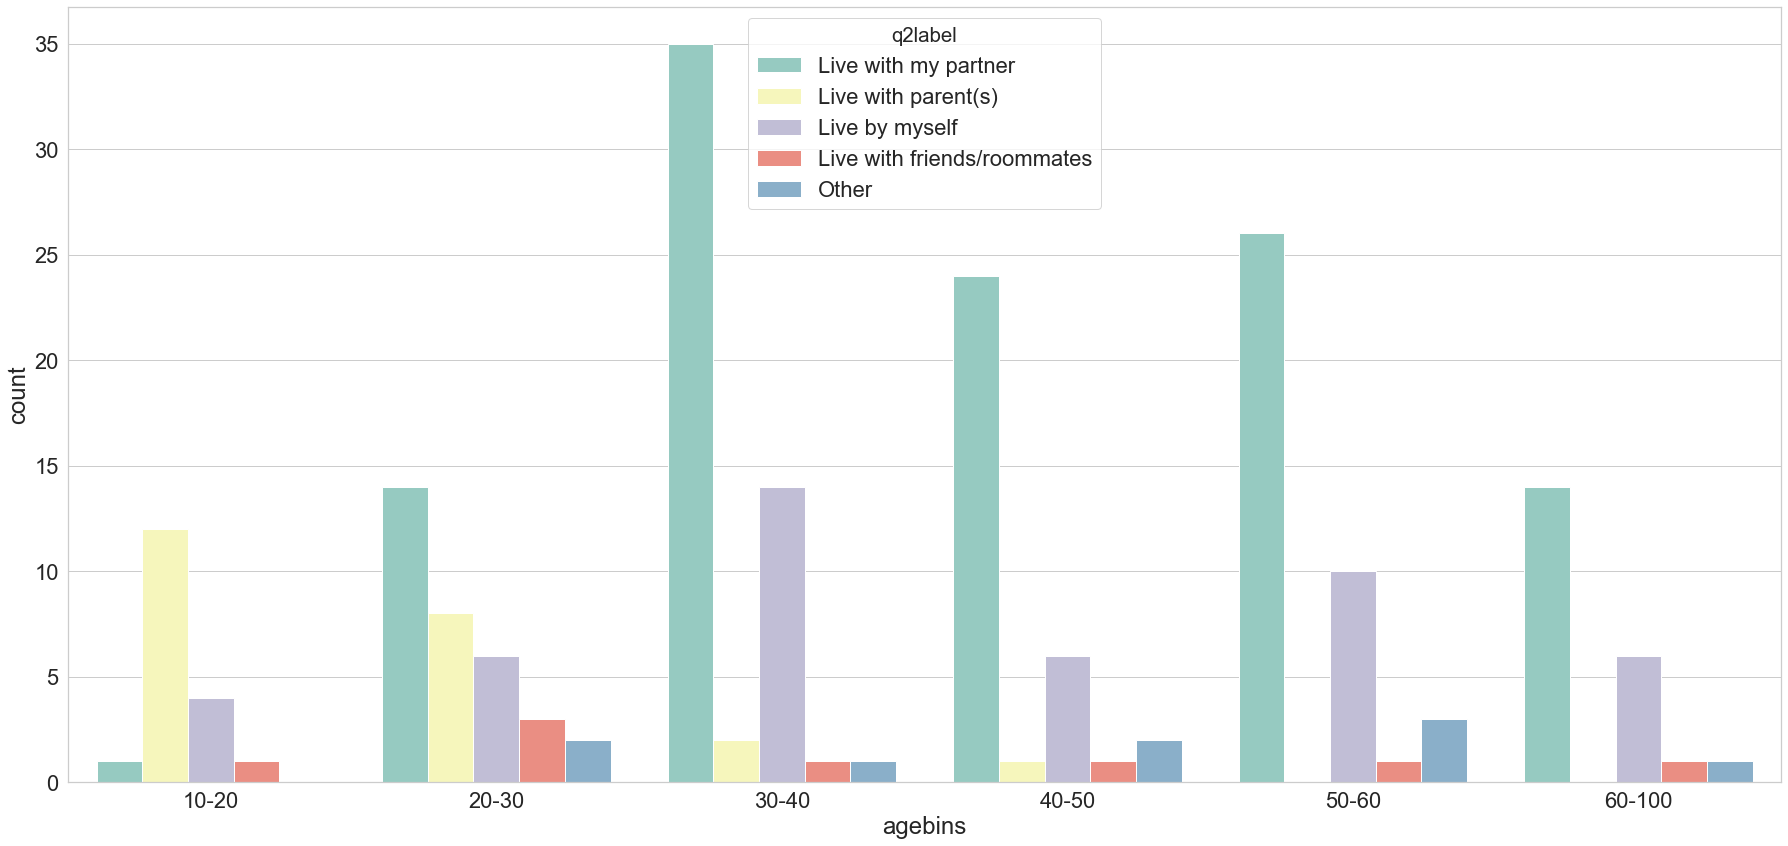

In [18]:
tak5f=sns.countplot(x="agebins", hue="q2label", data=raw, palette="Set3")

Living with a partner is a way too prevalent trend to ignore. It holds true for all age groups above 20 and . This in itself could be interesting for the clients since they might want to adjust their products in order to fulfil the needs of couples rather than individuals.